In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/home/iron/Install/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),name='W')

In [4]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

In [5]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

In [6]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [7]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float", shape=[None, 784], name="x")
    x_image = tf.reshape(x, [-1, 28, 28, 1])

In [8]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1 = conv2d(x_image, W1) + b1
    C1_Conv = tf.nn.relu(Conv1)

In [9]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

In [10]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2 = conv2d(C1_Pool, W2) + b2
    C2_Conv = tf.nn.relu(Conv2)

In [11]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv)

In [12]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [13]:
with tf.name_scope('D_Hidden_Layer'):
    W3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3) + b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=0.8)

In [14]:
with tf.name_scope('Output_layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4) + b4)

In [15]:
with tf.name_scope('optimizer'):
    y_label = tf.placeholder("float", shape=[None, 10], name="y_label")
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict, labels=y_label))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

In [16]:
with tf.name_scope('evaluate_model'):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [17]:
trainEpochs = 30
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list = [];accuracy_list = []; loss_list = [];
from time import time
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print (totalBatchs)

550


In [25]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
        
    loss,acc = sess.run([loss_function, accuracy],feed_dict={x:mnist.validation.images,
                                                                 y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:", '%2d' %(epoch+1), "Loss=", "{:.9f}".format(loss), " Accuracy=", acc)
        
duration = time() - startTime
print("Train Finished takes:", duration)

Train Epoch:  1 Loss= 1.475531697  Accuracy= 0.9876
Train Epoch:  2 Loss= 1.475676894  Accuracy= 0.987
Train Epoch:  3 Loss= 1.473857045  Accuracy= 0.988
Train Epoch:  4 Loss= 1.475501776  Accuracy= 0.9866
Train Epoch:  5 Loss= 1.475000739  Accuracy= 0.987
Train Epoch:  6 Loss= 1.475687027  Accuracy= 0.9856
Train Epoch:  7 Loss= 1.474544168  Accuracy= 0.9876
Train Epoch:  8 Loss= 1.475801587  Accuracy= 0.9856
Train Epoch:  9 Loss= 1.473520756  Accuracy= 0.9884
Train Epoch: 10 Loss= 1.473983288  Accuracy= 0.9878
Train Epoch: 11 Loss= 1.474992752  Accuracy= 0.9874
Train Epoch: 12 Loss= 1.473520756  Accuracy= 0.9886
Train Epoch: 13 Loss= 1.476383686  Accuracy= 0.9856
Train Epoch: 14 Loss= 1.474440217  Accuracy= 0.987
Train Epoch: 15 Loss= 1.473329902  Accuracy= 0.9888
Train Epoch: 16 Loss= 1.474049807  Accuracy= 0.9878
Train Epoch: 17 Loss= 1.473951459  Accuracy= 0.9876
Train Epoch: 18 Loss= 1.473410130  Accuracy= 0.9888
Train Epoch: 19 Loss= 1.473397613  Accuracy= 0.988
Train Epoch: 20 L

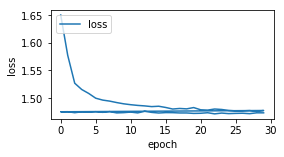

In [28]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

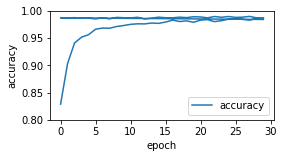

In [29]:
plt.plot(epoch_list, accuracy_list, label="accuracy")
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [1]:
print("Accuracy:", sess.run(accuracy,feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

NameError: name 'sess' is not defined

In [18]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)